**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# Notebook Title

*Milestone 2*

Muhammad Naufal Dwiki Kresnadi - Batch 007

## Description

Perusahaan mobil atau otomotif dari negeri china ingin mencoba untuk memasuki pasar US dengan melakukan produksi secara lokal di US. Hal ini bertujuan agar perusahaan dapat bersaing secara kompetitif terhadap rekan-rekan yang berada di US dan Eropa.

Lalu, perusahaan ini melakukan kerjasama dengan perusahaan konsultan otomotif untuk memberikan masukan part apa saja yang dapat mempengaruhi harga mobil secara keseluruhan dan perusahaan konsultan dapat memberikan saran dan prediksi terkait harga mobil yang ingin dibuat dengan part - part yang ada berdasarkan sejumlah dataset yang ada

### Objective

`Berdasarkan deskripsi permasalahan, didapatkan objective penelitian yang dilakukan :`
1. Perusahaan dapat mengetahui sparepart apa saja yang berpengaruh terhadap penentuan harga mobil
2. Perusahaan mendapatkan insight terkait perkiraan atau prediksi harga jual mobil dari kombinasi part - part baru

### Problem Statement

`Permasalahan yang dapat didefinisikan adalah sebagai berikut.`
1. Berapa banyak dan sparepart apa saja yang berpengaruh terhadap penentuan harga jual mobil?
2. Seberapa besar sparepart yang terpilih mempengaruhi harga mobil?
3. Bagaimana melakukan prediksi harga jual mobil dengan kombinasi part - part baru?
4. Model prediksi apa yang memiliki performa terbaik dari keseluruhan model-model yang diuji?

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

In [164]:
# import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [165]:
# import data
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [170]:
value_list = ['sedan', 'hatchback', 'wagon', 'hardtop', 'convertible']
x = df.carbody.isin(value_list)
filtered_df = df[x]
filtered_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Exploratory Data Analysis (EDA) Dataset

Dilakukan dengan tahapan sebagai berikut.
1. Melihat informasi mengenai dataset
2. Melihat informasi statistik pada dataset
3. Melakukan eksplorasi data untuk insight
4. Melihat korelasi feature dengan target

In [68]:
# info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [69]:
# informasi statistik dari feature numerik
df_nums = df.loc[:,['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize','boreratio','stroke','compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg','price']]
df_nums.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


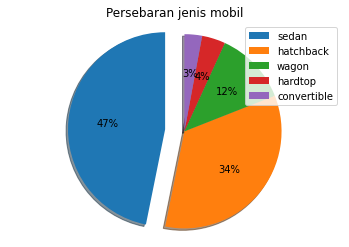

In [171]:
# eksplorasi data
# melihat persebaran jenis mobil
x = df['carbody'].value_counts()
labels = ['sedan', 'hatchback', 'wagon', 'hardtop', 'convertible']
explode = (0.2, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(x, explode=explode, autopct='%1.0f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.legend(loc='upper right', labels=labels)
plt.title('Persebaran jenis mobil')
plt.show()

In [181]:
x1 = pd.DataFrame(x)
lis1 = list(x1['carbody'])
lis1

[96, 70, 25, 8, 6]

In [71]:
%pip install streamlit-st_lottie

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement streamlit-st_lottie (from versions: none)
ERROR: No matching distribution found for streamlit-st_lottie
You should consider upgrading via the 'C:\Users\naufa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


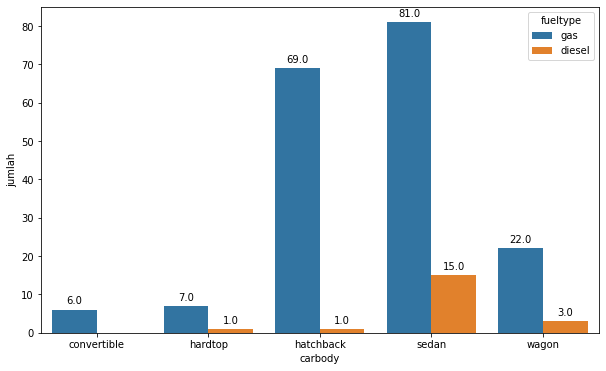

In [72]:
# dataset
x1 = df.groupby('carbody')['fueltype'].value_counts()
x1 = pd.DataFrame(x1)
x1.rename(columns={'fueltype' : 'jumlah'}, inplace=True)
x1.reset_index(inplace=True)

# persebaran fuel type terhadap jenis mobil
plt.figure(figsize=(10, 6))
splot = sns.barplot(x="carbody", hue="fueltype", y="jumlah", data=x1)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

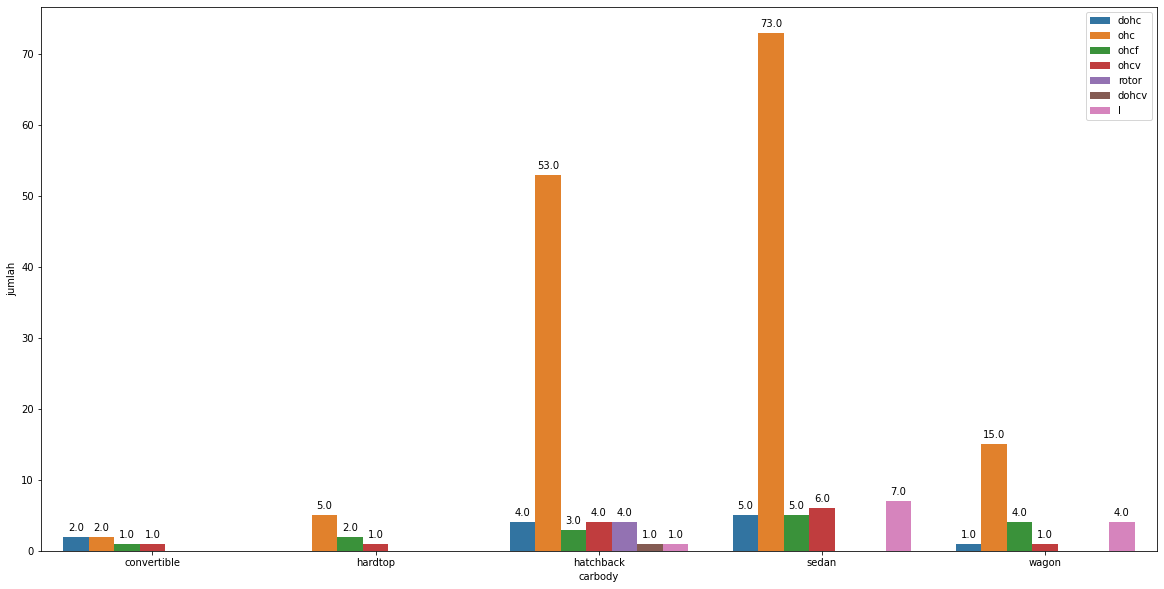

In [73]:
# melihat persebaran mobil terhadap jenis enginenya
x2 = df.groupby('carbody')['enginetype'].value_counts()
x2 = pd.DataFrame(x2)
x2.rename(columns={'enginetype' : 'jumlah'}, inplace=True)
x2.reset_index(inplace=True)

# visualisasi
plt.figure(figsize=(20, 10))
splot1 = sns.barplot(x="carbody", hue="enginetype", y="jumlah", data=x2)
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.legend(loc='upper right')
plt.show()

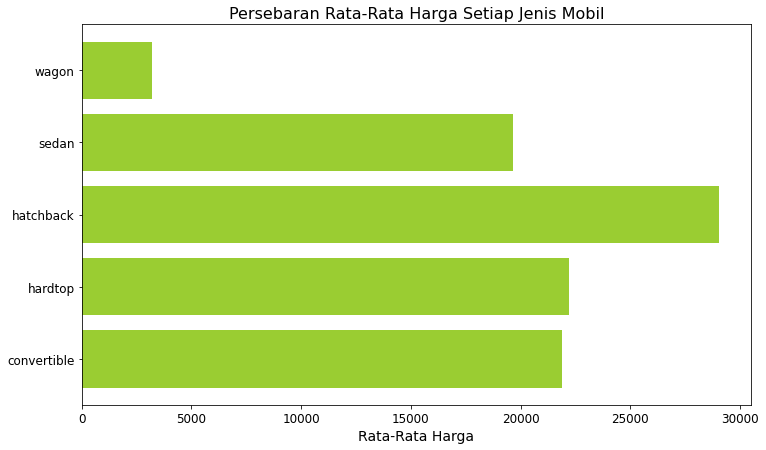

In [74]:
# dataset
z= df.loc[:,['carbody', 'price']]
z_group = z.groupby('carbody').sum()
z_group.reset_index(inplace=True)
z_group = z_group.sort_values(by='price', ascending=True)
b = pd.DataFrame(df['carbody'].value_counts())
b = b.sort_values(by='carbody', ascending=True)
b.reset_index(inplace=True)
b.rename(columns={'carbody' : 'jumlah per jenis mobil'}, inplace=True)
c =  pd.concat([z_group,b['jumlah per jenis mobil']], axis=1)
c['rata-rata harga'] = c['price']/c['jumlah per jenis mobil']

# melihat rata-rata harga jual setiap jenis mobil
plt.figure(figsize=(12,7))
jenis_mobil = list(c['carbody'])
plt.barh(jenis_mobil, c['rata-rata harga'], color='yellowgreen')

plt.title('Persebaran Rata-Rata Harga Setiap Jenis Mobil', size=16)
plt.xlabel('Rata-Rata Harga', size=14)
plt.xticks(size=12)
plt.yticks(size=12)

plt.show()

In [75]:
df.groupby('carbody')['drivewheel'].value_counts()

carbody      drivewheel
convertible  rwd            5
             fwd            1
hardtop      rwd            7
             fwd            1
hatchback    fwd           49
             rwd           19
             4wd            2
sedan        fwd           57
             rwd           36
             4wd            3
wagon        fwd           12
             rwd            9
             4wd            4
Name: drivewheel, dtype: int64

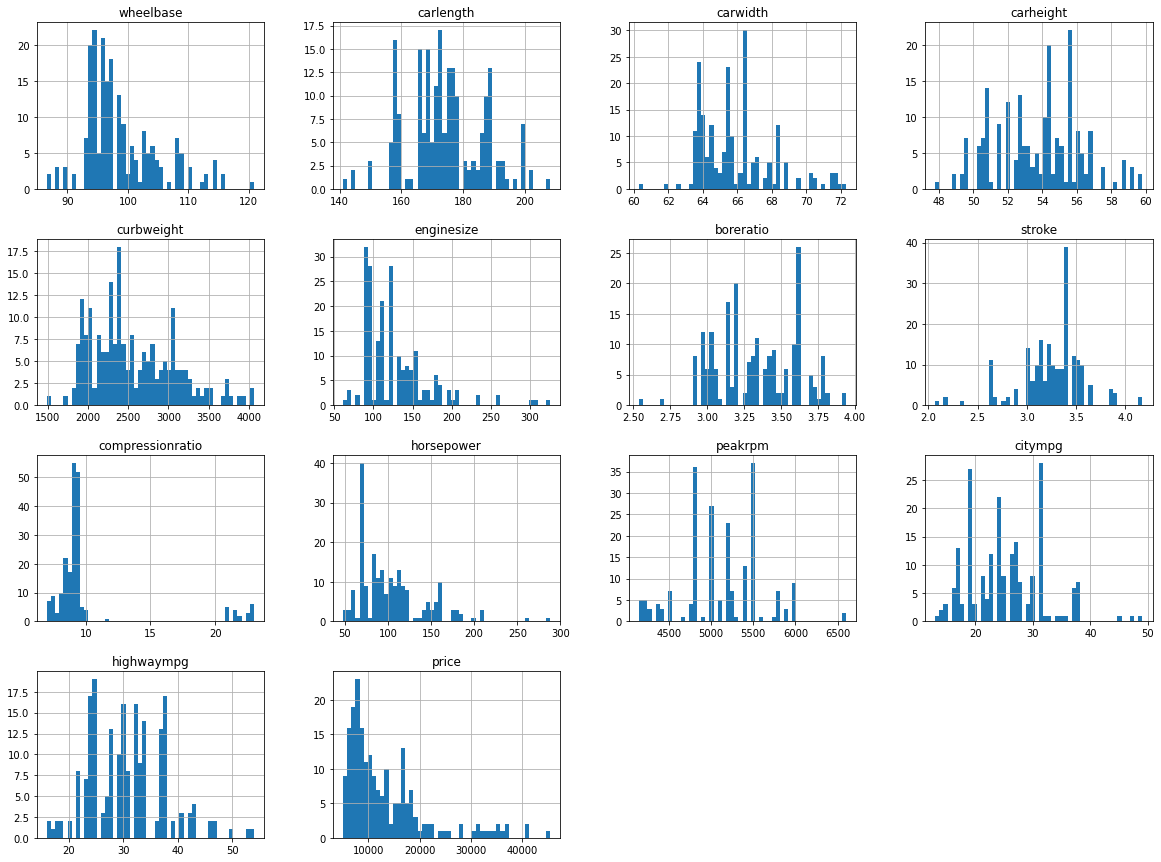

In [76]:
# melihat distribusi dengan visualisasi
df_nums.hist(bins=50, figsize=(20,15))
plt.show()

In [77]:
# melihat nilai skewness dari feature numerik
def nilai_skew(data, kolom):
    for i in kolom:
        x = data[kolom].skew()
    print("nilai skewness kolom adalah :")
    print(x)

nilai_skew(df_nums,['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize','boreratio','stroke','compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg','price'])

nilai skewness kolom adalah :
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64


<AxesSubplot:>

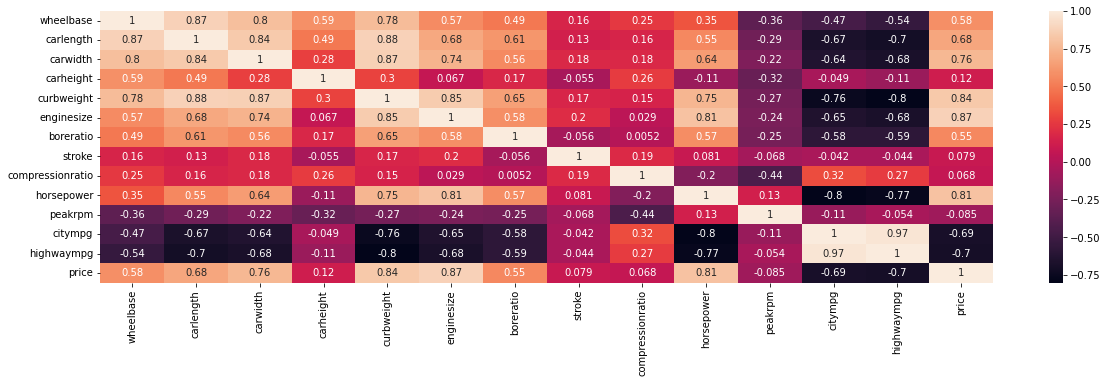

In [78]:
# melihat informasi pada dataset
df_nums = df.loc[:,['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize','boreratio','stroke','compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg','price']]
corr = df_nums.corr()
# visualisasi heatmap
plt.figure(figsize=(20,5))
sns.heatmap(corr,annot=True)

`Kesimpulan yang dapat diambil dari hasil EDA`

1. Dapat dilihat dari informasi bahwa secara tidak langsung `tidak terdapat nilai missing value`
2. Dari hasil eksplorasi yang dilakukan didapatkan informasi sebagai berikut :
    - Dapat dilihat bahwa mobil dengan jenis sedan memiliki `jumlah terbanyak` dari history pembelian yang ada
    - Dengan jenis mobil sedan yang ada didominasi dengan `81 mobil` diantaranya berjenis *fuel gas* dan sisanya berjenis *fuel diesel*
    - Di sisi lain, mobil jenis `hatchback` memiliki penjualan *variasi yang paling banyak*
3. Kemudian, apabila dilihat dari grafik distribusi, beberapa diantaranya terlihat memiliki distribusi yang normal dan beberapa lainnya berdistribusi tidak normal (skew). Hal tersebut kemudian dikonfirmasi melalui nilai skewness, didapat bahwa `feature yang berdistribusi normal` adalah **carlength, carheight, boreratio, peakrpm** dan sisa dari `feature lain berdistribusi skewness`.
4. Lalu dari nilai korelasi numerik yang dilihat pada tabel heatmap, dapat dilihat bahwa cukup banyak feature yang memiliki korelasi positif dan negatif cukup kuat terhadap target (price). Sehingga feature selection untuk modelling yang dilakukan dilakukan dengan pertimbangan sebagai berikut.
    - Nilai lebih 0.5 ataupun kurang dari -0.5 akan dianggap sebagai nilai dengan berkorelasi *sangat kuat*
    - Nilai korelasi yang dianggap sebagai korelasi *sangat kuat* akan dipilih untuk dilakukan model prediksi nantinya
    - Maka dari itu, feature numerik yang terpilih adalah `feature carlength, carwidth, curbweight, enginesize, horsepower, citympg, dan highwaympg`
5. Kemudian untuk feature kategorik akan dipilih berdasarkan personal judgment peneliti yang sekiranya dapat mempengaruhi penentuan harga jual mobil. Feature yang dipilih adalah `feature fueltype dan drivewheel`

### Data Pre-Processing

Dilakukan dengan tahapan sebagai berikut.
1. Dilakukan pemisahan data training dengan data inference
2. Melihat missing value secara keseluruhan pada dataset
3. Pemisahan dataset menjadi data train dan data test
4. Handling Outliers
5. Feature Engineering (feature scaling dan feature encoding)

In [79]:
# pemisahan data training dengan data inference
new_data = df.sample(n=10, random_state=48)
new_data = new_data.reset_index()
df_baru = df.drop(new_data.index)
df_baru = df_baru.reset_index()

#### Handling Missing Value

In [80]:
# melihat dengan menjumlahkan missing value yang ada
df_baru.isna().sum()

index               0
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**NOTE** : dapat dilihat bahwa missing value pada dataset tidak ada, sehingga tidak terdapat missing value. Dan juga dari hasil eksplorasi tidak terdapat nilai kategorik dair feature kategorik terpilih yang memiliki nilai null (seperti - dan unkown)

#### Split data train dan data test dari dataset

In [81]:
# memisahkan feature dengan target
x = df_baru.loc[:,['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg','highwaympg','fueltype', 'drivewheel']]
y = df_baru.loc[:,['price']]

In [82]:
# split data train dan data test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Handling Outliers

Dilakukan dengan tahapan sebagai berikut :
1. IQR untuk feature numerik distribusi skew
2. Z-Score untuk feature numerik distribusi normal

In [83]:
# Deteksi outliers dengan treshold 1.5 dan -1.5
# function diagnostic
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

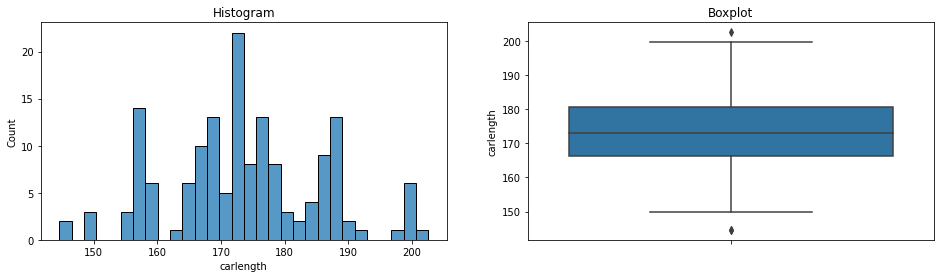

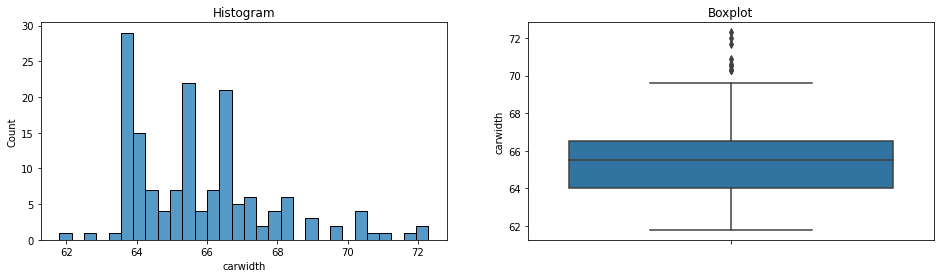

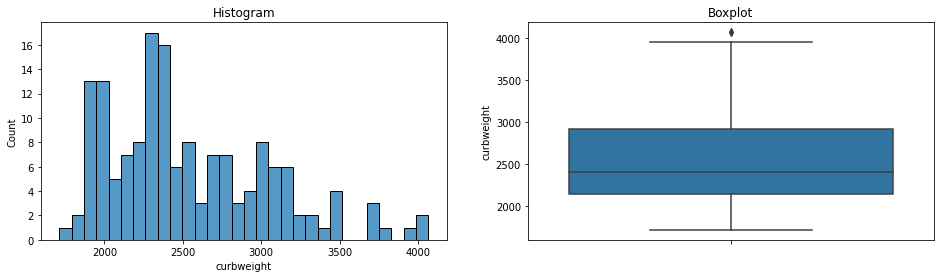

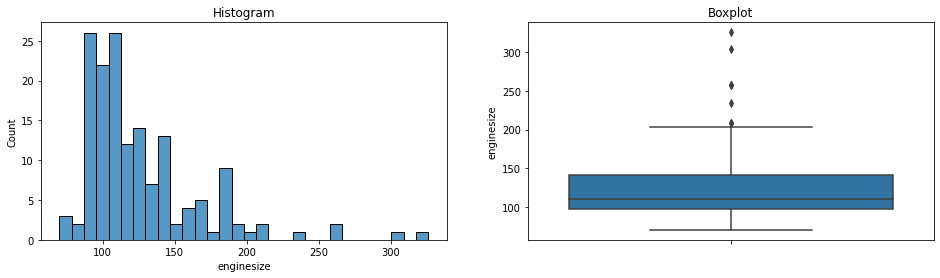

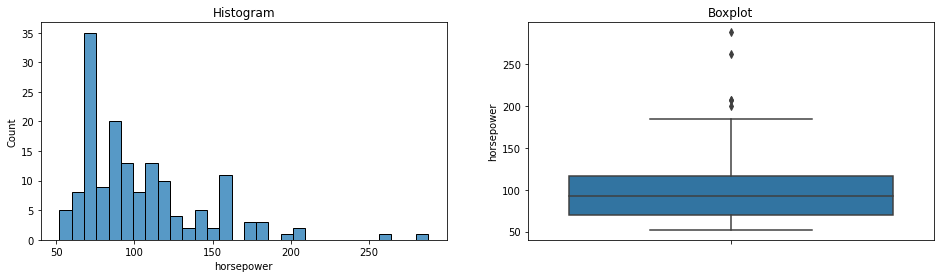

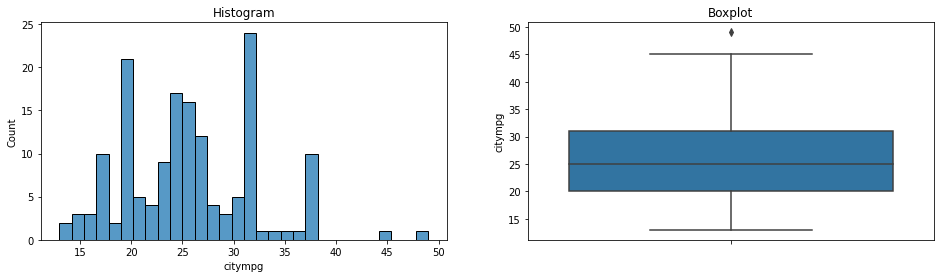

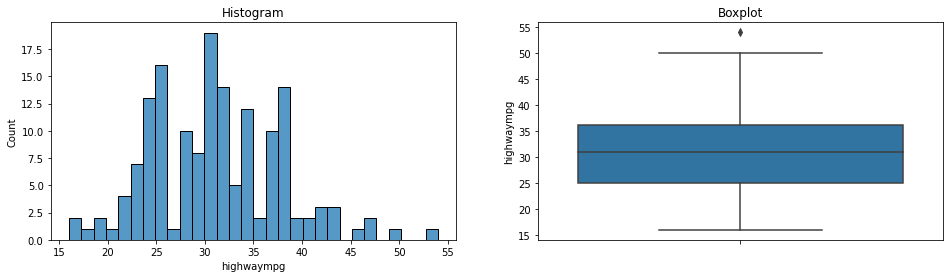

In [84]:
# Deteksi outliers
diagnostic_plots(x_train, 'carlength')
diagnostic_plots(x_train, 'carwidth')
diagnostic_plots(x_train, 'curbweight')
diagnostic_plots(x_train, 'enginesize')
diagnostic_plots(x_train, 'horsepower')
diagnostic_plots(x_train, 'citympg')
diagnostic_plots(x_train, 'highwaympg')

**NOTE** : Handle outliers dilakukan agar model yang sensitif terhadap outliers dapat belajar lebih baik. Maka dari itu terdapat beberapa handling sebagai berikut.
- Trimming, dilakukan pada feature `carlength, carwidth, enginesize, dan horsepower`
- Capping, apabila masih terdapat outliers lain setelah trimming

In [85]:
# menggabungkan x_train dan y_train
gab = pd.concat([x_train, y_train], axis=1)
gab

,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,fueltype,drivewheel,price
57,190.9,70.3,3515,183,123,22,25,diesel,rwd,25552.0
35,155.9,63.6,1909,90,70,38,43,gas,fwd,8916.5
53,177.8,66.5,2443,122,64,36,42,diesel,fwd,10795.0
139,173.6,65.4,2650,108,111,23,23,gas,4wd,11694.0
112,167.3,63.8,2191,98,68,31,38,gas,fwd,7609.0
...,...,...,...,...,...,...,...,...,...,...
79,165.3,63.8,1889,97,69,31,37,gas,fwd,5499.0
117,168.9,65.0,2756,194,207,17,25,gas,rwd,34028.0
24,150.0,64.0,1956,92,76,30,34,gas,fwd,7129.0
37,199.6,69.6,4066,258,176,15,19,gas,rwd,32250.0


In [86]:
# fungsi deteksi
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [87]:
# deteksi limit upper dan lower
# Limits for `carlength`
cl_upper_limit, cl_lower_limit = find_skewed_boundaries(gab, 'carlength', 1.5)
cl_upper_limit, cl_lower_limit

# Limits for `carwidth`
cw_upper_limit, cw_lower_limit = find_skewed_boundaries(gab, 'carwidth', 1.5)
cw_upper_limit, cw_lower_limit

# Limits for `enginesize`
ez_upper_limit, ez_lower_limit = find_skewed_boundaries(gab, 'enginesize', 1.5)
ez_upper_limit, ez_lower_limit

# Limits for `horsepower`
hp_upper_limit, hp_lower_limit = find_skewed_boundaries(gab, 'horsepower', 1.5)
hp_upper_limit, hp_lower_limit

(185.0, 1.0)

In [88]:
# deteksi outliers upper dan lower
# Flag the outliers in category `carlength`
outliers_cl = np.where(gab['carlength'] > cl_upper_limit, True,
                       np.where(gab['carlength'] < cl_lower_limit, True, False))

# Flag the outliers in category `carwidth`
outliers_cw = np.where(gab['carwidth'] > cw_upper_limit, True,
                       np.where(gab['carwidth'] < cw_lower_limit, True, False))

# Flag the outliers in category `enginesize`
outliers_ez = np.where(gab['enginesize'] > ez_upper_limit, True,
                       np.where(gab['enginesize'] < ez_lower_limit, True, False))

# Flag the outliers in category `horsepower`
outliers_hp = np.where(gab['horsepower'] > hp_upper_limit, True,
                       np.where(gab['horsepower'] < hp_lower_limit, True, False))

In [89]:
# Trimming dataset

x_trimmed = gab.loc[~(outliers_cl + outliers_cw + outliers_ez + outliers_hp)]
print('Size dataset - Before trimming : ', gab.shape)
print('Size dataset - After trimming  : ', x_trimmed.shape)

Size dataset - Before trimming :  (156, 10)
Size dataset - After trimming  :  (139, 10)


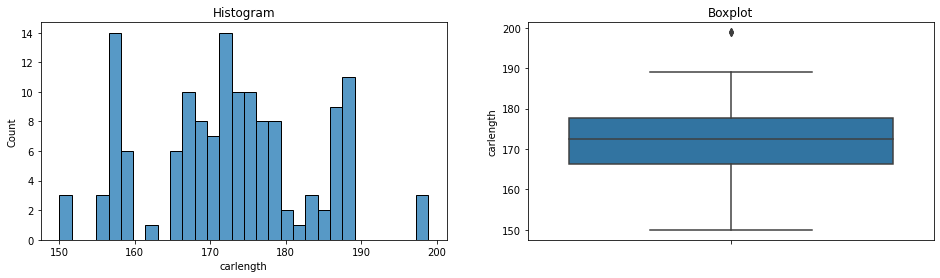

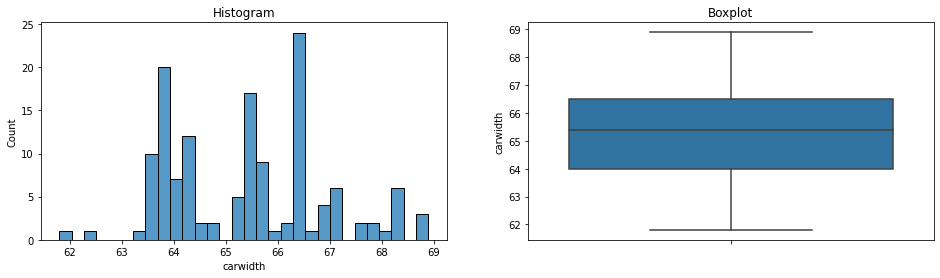

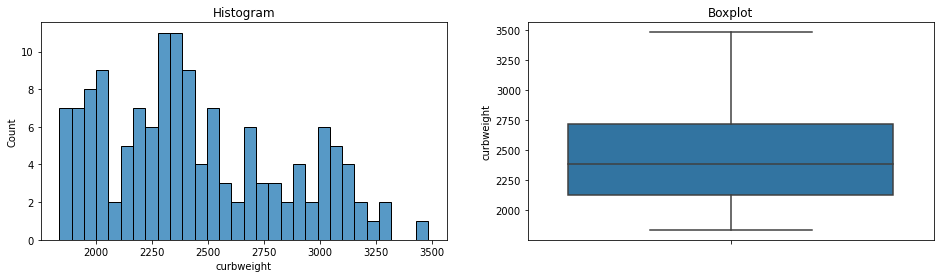

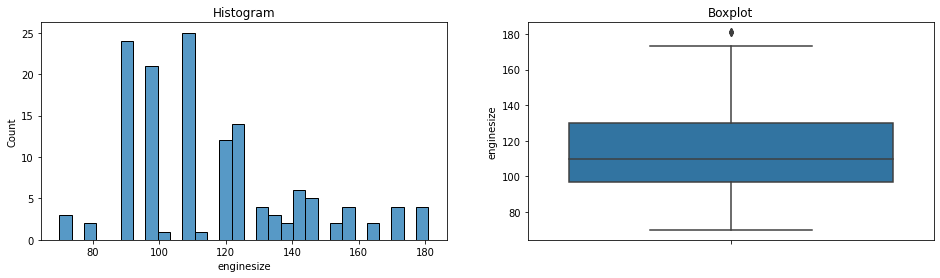

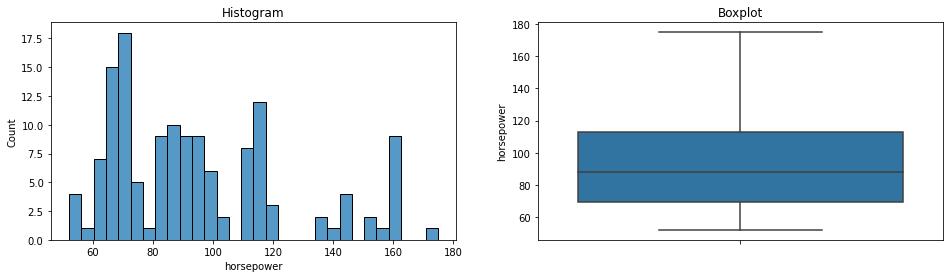

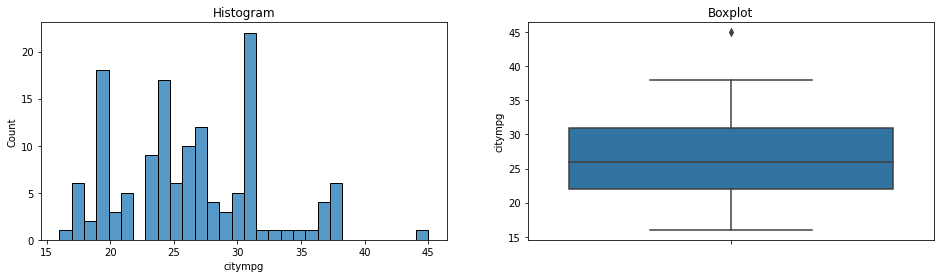

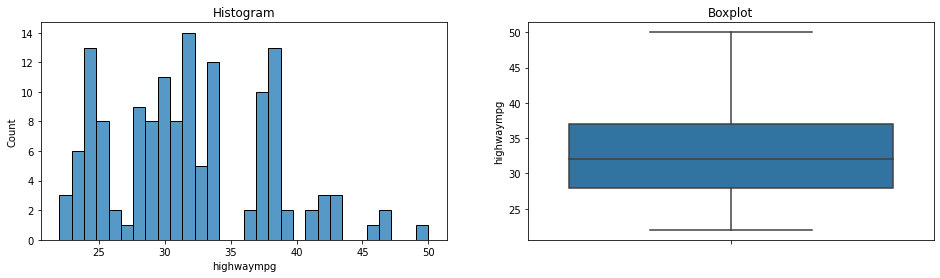

In [90]:
# deteksi kembali setelah dilakukan trimming
diagnostic_plots(x_trimmed, 'carlength')
diagnostic_plots(x_trimmed, 'carwidth')
diagnostic_plots(x_trimmed, 'curbweight')
diagnostic_plots(x_trimmed, 'enginesize')
diagnostic_plots(x_trimmed, 'horsepower')
diagnostic_plots(x_trimmed, 'citympg')
diagnostic_plots(x_trimmed, 'highwaympg')

**NOTE** : hasil penanganan outliers akan dibiarkan seperti pada variabel x_trimmed karena dari jumlah tidak terlalu banyak dan tidak akan dilakukan capping

#### Feature Engineering

Dilakukan dengan tahapan sebagai berikut :
1. feature scaling (untuk data numerik)
2. feature kategorik (untuk data kategorik)

In [91]:
# memisahkan x_train dan y_train
x_trimmeds = x_trimmed.loc[:,['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg','highwaympg','fueltype', 'drivewheel']]
y_train1 = x_trimmed.loc[:,['price']]

In [92]:
# import module
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

##### Data Train

In [93]:
# dilakukan pemisahan terhadap feature numerik dan kategorik
x_numerik = x_trimmeds.loc[:, ['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg','highwaympg']]
x_kategorik = x_trimmeds.loc[:,['fueltype', 'drivewheel']]

In [94]:
# Feature Scaling 
# pada data train
scale = StandardScaler()

x_numerik_ = scale.fit_transform(x_numerik[['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg','highwaympg']])
x_numerik_ = pd.DataFrame(x_numerik_)
x_numerik_.rename(columns = {0 : 'carlength', 1: 'carwidth', 2: 'curbweight', 3:'enginesize', 4:'horsepower', 5:'citympg',6:'highwaympg'},inplace=True)
x_numerik_

,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg
0,-1.564971,-1.209543,-1.341346,-1.039729,-0.853199,2.040168,1.856831
1,0.497961,0.710011,-0.004826,0.234648,-1.055694,1.696430,1.691171
2,0.102330,-0.018096,0.513264,-0.322892,0.530518,-0.537862,-1.456385
3,-0.491116,-1.077160,-0.635543,-0.721134,-0.920697,0.837087,1.028527
4,0.497961,0.710011,-0.087420,0.234648,-0.380710,-0.022256,0.034562
...,...,...,...,...,...,...,...
134,0.497961,0.710011,-0.149991,0.234648,-0.380710,-0.022256,0.034562
135,-0.048386,-0.018096,-0.262619,-0.322892,-0.043218,-0.022256,0.034562
136,-0.679512,-1.077160,-1.391403,-0.760959,-0.886948,0.837087,0.862866
137,-2.120738,-0.944777,-1.223712,-0.960080,-0.650704,0.665218,0.365884


In [95]:
# Feature OneHotEncoding
# pada data train
Encoder = OneHotEncoder(sparse=False)

Encoder.fit_transform(x_kategorik[['fueltype', 'drivewheel']])
x_kategorik_ = pd.DataFrame(Encoder.fit_transform(x_kategorik[['fueltype', 'drivewheel']]))
x_kategorik_.rename(columns = {0 : 'diesel_fuel', 1: 'gas_fuel', 2: '4wd', 3:'fwd', 4:'rwd'},inplace=True)
x_kategorik_

,diesel_fuel,gas_fuel,4wd,fwd,rwd
0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...
134,0.0,1.0,0.0,1.0,0.0
135,0.0,1.0,0.0,1.0,0.0
136,0.0,1.0,0.0,1.0,0.0
137,0.0,1.0,0.0,1.0,0.0


In [96]:
# menggabungkan dataframe
x_fix = pd.concat([x_numerik_, x_kategorik_], axis = 1)
x_fix

,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,diesel_fuel,gas_fuel,4wd,fwd,rwd
0,-1.564971,-1.209543,-1.341346,-1.039729,-0.853199,2.040168,1.856831,0.0,1.0,0.0,1.0,0.0
1,0.497961,0.710011,-0.004826,0.234648,-1.055694,1.696430,1.691171,1.0,0.0,0.0,1.0,0.0
2,0.102330,-0.018096,0.513264,-0.322892,0.530518,-0.537862,-1.456385,0.0,1.0,1.0,0.0,0.0
3,-0.491116,-1.077160,-0.635543,-0.721134,-0.920697,0.837087,1.028527,0.0,1.0,0.0,1.0,0.0
4,0.497961,0.710011,-0.087420,0.234648,-0.380710,-0.022256,0.034562,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.497961,0.710011,-0.149991,0.234648,-0.380710,-0.022256,0.034562,0.0,1.0,0.0,1.0,0.0
135,-0.048386,-0.018096,-0.262619,-0.322892,-0.043218,-0.022256,0.034562,0.0,1.0,0.0,1.0,0.0
136,-0.679512,-1.077160,-1.391403,-0.760959,-0.886948,0.837087,0.862866,0.0,1.0,0.0,1.0,0.0
137,-2.120738,-0.944777,-1.223712,-0.960080,-0.650704,0.665218,0.365884,0.0,1.0,0.0,1.0,0.0


##### Data Test

In [97]:
# memisahkan feature numerik dan feature kategorik
x_numeriks = x_test.loc[:, ['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg','highwaympg']]
x_kategoriks = x_test.loc[:,['fueltype', 'drivewheel']]

In [98]:
# feature scaling
x_numeriks_ = scale.transform(x_numeriks)
x_numeriks_ = pd.DataFrame(x_numeriks_)
x_numeriks_.rename(columns = {0 : 'carlength', 1: 'carwidth', 2: 'curbweight', 3:'enginesize', 4:'horsepower', 5:'citympg',6:'highwaympg'},inplace=True)
x_numeriks_

,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg
0,-1.433094,-1.077160,-0.793222,-0.721134,0.226775,-0.365994,-0.296759
1,-0.472277,-0.150479,-0.522915,-0.243243,-0.313212,0.149612,0.200223
2,0.403763,-0.415245,-0.124962,-0.322892,0.193026,-0.537862,-0.462420
3,0.347244,0.114288,0.673446,1.190431,0.699264,-0.365994,-0.296759
4,2.834066,4.151971,3.241367,4.694966,2.015482,-1.740943,-2.284689
5,-0.076646,0.048096,-0.582983,-0.283067,-0.346961,0.149612,0.365884
6,-1.433094,-0.680011,-1.318820,-0.960080,-0.920697,1.868299,1.525510
7,2.005126,1.636693,2.340342,3.699360,2.926710,-1.740943,-1.622046
8,-1.263538,-0.812394,-1.363871,-0.999904,-0.920697,0.837087,1.028527
9,-0.679512,-1.077160,-1.318820,-0.760959,-0.886948,0.837087,0.862866


In [99]:
# feature encode
x_kategoriks_ = pd.DataFrame(Encoder.transform(x_kategoriks))
x_kategoriks_.rename(columns = {0 : 'diesel_fuel', 1: 'gas_fuel', 2: '4wd', 3:'fwd', 4:'rwd'},inplace=True)
x_kategoriks_

,diesel_fuel,gas_fuel,4wd,fwd,rwd
0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
5,0.0,1.0,0.0,1.0,0.0
6,0.0,1.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0,1.0
8,0.0,1.0,0.0,1.0,0.0
9,0.0,1.0,0.0,1.0,0.0


In [100]:
# menggabungkan dataframe
x_test_fix = pd.concat([x_numeriks_, x_kategoriks_], axis = 1)
x_test_fix

,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,diesel_fuel,gas_fuel,4wd,fwd,rwd
0,-1.433094,-1.077160,-0.793222,-0.721134,0.226775,-0.365994,-0.296759,0.0,1.0,0.0,1.0,0.0
1,-0.472277,-0.150479,-0.522915,-0.243243,-0.313212,0.149612,0.200223,0.0,1.0,0.0,1.0,0.0
2,0.403763,-0.415245,-0.124962,-0.322892,0.193026,-0.537862,-0.462420,0.0,1.0,0.0,0.0,1.0
3,0.347244,0.114288,0.673446,1.190431,0.699264,-0.365994,-0.296759,0.0,1.0,0.0,0.0,1.0
4,2.834066,4.151971,3.241367,4.694966,2.015482,-1.740943,-2.284689,0.0,1.0,0.0,0.0,1.0
5,-0.076646,0.048096,-0.582983,-0.283067,-0.346961,0.149612,0.365884,0.0,1.0,0.0,1.0,0.0
6,-1.433094,-0.680011,-1.318820,-0.960080,-0.920697,1.868299,1.525510,0.0,1.0,0.0,1.0,0.0
7,2.005126,1.636693,2.340342,3.699360,2.926710,-1.740943,-1.622046,0.0,1.0,0.0,0.0,1.0
8,-1.263538,-0.812394,-1.363871,-0.999904,-0.920697,0.837087,1.028527,0.0,1.0,0.0,1.0,0.0
9,-0.679512,-1.077160,-1.318820,-0.760959,-0.886948,0.837087,0.862866,0.0,1.0,0.0,1.0,0.0


### Modelling 

Pemodelan dilakukan dengan model sebagai berikut.
- Linear Regression
- SVM (SVR)
- KNN
- Decision Tree
- Random Forest

Dilakukan dengan tahapan sebagai berikut.
1. Pembuatan model baseline terhadap keseluruhan model uji
2. Melakukan evaluasi model
3. Melakukan hyperparameter tuning terhadap model yang terbaik dari uji baseline yang ada
4. Melakukan evaluasi terhadap model setelah tuning

##### Baseline Model

In [101]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lg = LinearRegression()
lg.fit(x_fix,y_train1)

LinearRegression()

In [102]:
# prediksi
pred1 = lg.predict(x_test_fix)

In [128]:
# prediksi train
pred1_train = lg.predict(x_fix)

In [103]:
# SVR
from sklearn.svm import SVR

svr = SVR(kernel='poly', gamma='auto')
svr.fit(x_fix,y_train1)

C:\Users\naufa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(gamma='auto', kernel='poly')

In [104]:
# prediksi
pred2 = svr.predict(x_test_fix)

In [129]:
# prediksi train
pred2_train = svr.predict(x_fix)

In [105]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors= 4, p = 1)
knn.fit(x_fix,y_train1)

KNeighborsRegressor(n_neighbors=4, p=1)

In [106]:
# prediksi
pred3 = knn.predict(x_test_fix)

In [130]:
# prediksi train
pred3_train = knn.predict(x_fix)

In [107]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10, max_features='auto')
dt.fit(x_fix,y_train1)

DecisionTreeRegressor(max_depth=10, max_features='auto')

In [108]:
# prediksi
pred4 = dt.predict(x_test_fix)

In [131]:
# prediksi train
pred4_train = dt.predict(x_fix)

In [109]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=5, n_estimators=200)
rf.fit(x_fix,y_train1)

C:\Users\naufa\AppData\Local\Temp/ipykernel_21320/741670671.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_fix,y_train1)


RandomForestRegressor(max_depth=5, n_estimators=200)

In [110]:
# prediksi
pred5 = rf.predict(x_test_fix)

In [132]:
# prediksi train
pred5_train = rf.predict(x_fix)

##### Model Baseline Evaluasi

In [111]:
# import module
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [134]:
# evaluasi model 
mea_lg = mean_absolute_error(y_test, pred1)
r2_lg = r2_score(y_test, pred1)
mse_lg = mean_squared_error(y_test, pred1)

print(f"Nilai evaluasi berdasarkan MEA (lg) : {mea_lg}")
print(f"Nilai evaluasi berdasarkan r2 (lg) : {r2_lg}")
print(f"Nilai evaluasi berdasarkan MSE (lg) : {mse_lg}")

mea_svr = mean_absolute_error(y_test, pred2)
r2_svr = r2_score(y_test, pred2)
mse_svr = mean_squared_error(y_test, pred2)

print(" ")
print(f"Nilai evaluasi berdasarkan MEA (svr) : {mea_svr}")
print(f"Nilai evaluasi berdasarkan r2 (svr) : {r2_svr}")
print(f"Nilai evaluasi berdasarkan MSE (svr) : {mse_svr}")

mea_knn = mean_absolute_error(y_test, pred3)
r2_knn = r2_score(y_test, pred3)
mse_knn = mean_squared_error(y_test, pred3)

print(" ")
print(f"Nilai evaluasi berdasarkan MEA (knn) : {mea_knn}")
print(f"Nilai evaluasi berdasarkan r2 (knn) : {r2_knn}")
print(f"Nilai evaluasi berdasarkan MSE (knn) : {mse_knn}")

mea_dt = mean_absolute_error(y_test, pred4)
r2_dt = r2_score(y_test, pred4)
mse_dt = mean_squared_error(y_test, pred4)

print(" ")
print(f"Nilai evaluasi berdasarkan MEA (dt) : {mea_dt}")
print(f"Nilai evaluasi berdasarkan r2 (dt) : {r2_dt}")
print(f"Nilai evaluasi berdasarkan MSE (dt) : {mse_dt}")

mea_rf = mean_absolute_error(y_test, pred5)
r2_rf = r2_score(y_test, pred5)
mse_rf = mean_squared_error(y_test, pred5)

print(" ")
print(f"Nilai evaluasi berdasarkan MEA (rf) : {mea_rf}")
print(f"Nilai evaluasi berdasarkan r2 (rf) : {r2_rf}")
print(f"Nilai evaluasi berdasarkan MSE (rf) : {mse_rf}")

Nilai evaluasi berdasarkan MEA (lg) : 3230.6775750498336
Nilai evaluasi berdasarkan r2 (lg) : 0.5830457164430372
Nilai evaluasi berdasarkan MSE (lg) : 35797832.913444184
 
Nilai evaluasi berdasarkan MEA (svr) : 6542.076375346853
Nilai evaluasi berdasarkan r2 (svr) : -0.18650721330891384
Nilai evaluasi berdasarkan MSE (svr) : 101868211.09088348
 
Nilai evaluasi berdasarkan MEA (knn) : 3342.4102564102564
Nilai evaluasi berdasarkan r2 (knn) : 0.4901753605646044
Nilai evaluasi berdasarkan MSE (knn) : 43771266.96474359
 
Nilai evaluasi berdasarkan MEA (dt) : 3313.311965811966
Nilai evaluasi berdasarkan r2 (dt) : 0.49267928062855204
Nilai evaluasi berdasarkan MSE (dt) : 43556291.56908832
 
Nilai evaluasi berdasarkan MEA (rf) : 3141.6660436213483
Nilai evaluasi berdasarkan r2 (rf) : 0.5415205848506038
Nilai evaluasi berdasarkan MSE (rf) : 39362995.2851401


In [136]:
# train test
mea_lg_train = mean_absolute_error(y_train1, pred1_train)
r2_lg_train = r2_score(y_train1, pred1_train)
mse_lg_train = mean_squared_error(y_train1, pred1_train)

print(f"Nilai evaluasi berdasarkan MEA (lg) : {mea_lg_train}")
print(f"Nilai evaluasi berdasarkan r2 (lg) : {r2_lg_train}")
print(f"Nilai evaluasi berdasarkan MSE (lg) : {mse_lg_train}")

mea_svr_train = mean_absolute_error(y_train1, pred2_train)
r2_svr_train = r2_score(y_train1, pred2_train)
mse_svr_train = mean_squared_error(y_train1, pred2_train)

print(" ")
print(f"Nilai evaluasi berdasarkan MEA (svr) : {mea_svr_train}")
print(f"Nilai evaluasi berdasarkan r2 (svr) : {r2_svr_train}")
print(f"Nilai evaluasi berdasarkan MSE (svr) : {mse_svr_train}")

mea_knn_train = mean_absolute_error(y_train1, pred3_train)
r2_knn_train = r2_score(y_train1, pred3_train)
mse_knn_train = mean_squared_error(y_train1, pred3_train)

print(" ")
print(f"Nilai evaluasi berdasarkan MEA (knn) : {mea_knn_train}")
print(f"Nilai evaluasi berdasarkan r2 (knn) : {r2_knn_train}")
print(f"Nilai evaluasi berdasarkan MSE (knn) : {mse_knn_train}")

mea_dt_train = mean_absolute_error(y_train1, pred4_train)
r2_dt_train = r2_score(y_train1, pred4_train)
mse_dt_train = mean_squared_error(y_train1, pred4_train)

print(" ")
print(f"Nilai evaluasi berdasarkan MEA (dt) : {mea_dt_train}")
print(f"Nilai evaluasi berdasarkan r2 (dt) : {r2_dt_train}")
print(f"Nilai evaluasi berdasarkan MSE (dt) : {mse_dt_train}")

mea_rf_train = mean_absolute_error(y_train1, pred5_train)
r2_rf_train = r2_score(y_train1, pred5_train)
mse_rf_train = mean_squared_error(y_train1, pred5_train)

print(" ")
print(f"Nilai evaluasi berdasarkan MEA (rf) : {mea_rf_train}")
print(f"Nilai evaluasi berdasarkan r2 (rf) : {r2_rf_train}")
print(f"Nilai evaluasi berdasarkan MSE (rf) : {mse_rf_train}")

Nilai evaluasi berdasarkan MEA (lg) : 1346.0617281420855
Nilai evaluasi berdasarkan r2 (lg) : 0.7826401820926999
Nilai evaluasi berdasarkan MSE (lg) : 3825670.6669757273
 
Nilai evaluasi berdasarkan MEA (svr) : 3209.761239217249
Nilai evaluasi berdasarkan r2 (svr) : -0.07455616784221974
Nilai evaluasi berdasarkan MSE (svr) : 18912870.147347324
 
Nilai evaluasi berdasarkan MEA (knn) : 1166.2122302158273
Nilai evaluasi berdasarkan r2 (knn) : 0.832014741796558
Nilai evaluasi berdasarkan MSE (knn) : 2956647.0977967624
 
Nilai evaluasi berdasarkan MEA (dt) : 76.8621103117506
Nilai evaluasi berdasarkan r2 (dt) : 0.9966552794333177
Nilai evaluasi berdasarkan MSE (dt) : 58869.203537170266
 
Nilai evaluasi berdasarkan MEA (rf) : 792.6845787442578
Nilai evaluasi berdasarkan r2 (rf) : 0.9384730622506858
Nilai evaluasi berdasarkan MSE (rf) : 1082913.1310589274


In [137]:
# gap antar MEA
print(f"Nilai gap evaluasi berdasarkan MEA (lg) : {mea_lg - mea_lg_train}")
print(f"Nilai gap evaluasi berdasarkan MEA (svr) : {mea_svr - mea_svr_train}")
print(f"Nilai gap evaluasi berdasarkan MEA (knn) : {mea_knn - mea_knn_train}")
print(f"Nilai gap evaluasi berdasarkan MEA (dt) : {mea_dt - mea_dt_train}")
print(f"Nilai gap evaluasi berdasarkan MEA (rf) : {mea_rf - mea_rf_train}")

Nilai gap evaluasi berdasarkan MEA (lg) : 1884.6158469077482
Nilai gap evaluasi berdasarkan MEA (svr) : 3332.3151361296036
Nilai gap evaluasi berdasarkan MEA (knn) : 2176.198026194429
Nilai gap evaluasi berdasarkan MEA (dt) : 3236.449855500215
Nilai gap evaluasi berdasarkan MEA (rf) : 2348.9814648770907


`Kesimpulan Hasil Evaluasi terhadap Prediksi 5 Model`

1. Didapatkan bahwa `model terbaik` adalah **Linear Regressi** dan `model paling sulit belajar` adalah **Model SVR**
2. Dapat dilihat bahwa dari nilai `mean absolute error` dari model linear regresi menunjukkan gap error paling kecil sebesar **1884.616**, yang artinya kesalahan prediksi harga pada model kurang lebih pada *gap* sebesar `$ 1884`.
3. Dilihat juga pada nilai `R2-Square` sebesar **0.58** hampir mendekati 1 (dari rentang 0  - 1), artinya model belajar cukup baik dengan kesalahan belajar sebesar *0.42*
4. Namun, untuk melakukan hyperparameter tuning akan dilakukan pada model kedua terbaik, yaitu `Random Forest`

##### Hypertuning Model Terbaik

Dari model yang terpilih, yaitu KNRegressor. Akan dilakukan hypertuning dengan beberapa kombinasi antar hyperparameter untuk melihat apakah model dapat bekerja dengan lebih baik.

Hypertuning akan dilakukan dengan grid search langsung pada kombinasi model

In [151]:
# hypertuning model
param_grid1 = {
    'max_depth' : [5, 10, 20],
    'n_estimators' : [100, 200, 300],
    'max_features' : ['auto', 'sqrt'],
    'min_samples_split' : [3, 5, 10],
    'criterion' : ['squared_error', 'absolute_error', 'poisson']
}

print(param_grid1)

{'max_depth': [5, 10, 20], 'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [3, 5, 10], 'criterion': ['squared_error', 'absolute_error', 'poisson']}


In [152]:
# pencarian gridsearch
from sklearn.model_selection import GridSearchCV
knn1 = RandomForestRegressor()
grid_search=GridSearchCV(estimator=knn1,param_grid=param_grid1,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(x_fix,y_train1)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\Users\naufa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [153]:
# best param
gs = grid_search.best_params_
gs

{'criterion': 'absolute_error',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 100}

In [154]:
# hasil prediksi dari tuning
pred6 = grid_search.predict(x_test_fix)

##### Evaluasi Hypertuning

In [155]:
# evaluasi model tuning
mea_dt_t = mean_absolute_error(y_test, pred6)
r2_dt_t = r2_score(y_test, pred6)
mse_dt_t = mean_squared_error(y_test, pred6)

print(" ")
print(f"Nilai evaluasi berdasarkan MEA (dt_t) : {mea_dt_t}")
print(f"Nilai evaluasi berdasarkan r2 (dt_t) : {r2_dt_t}")
print(f"Nilai evaluasi berdasarkan MSE (dt_t) : {mse_dt_t}")

 
Nilai evaluasi berdasarkan MEA (dt_t) : 3079.281923076923
Nilai evaluasi berdasarkan r2 (dt_t) : 0.523340214966149
Nilai evaluasi berdasarkan MSE (dt_t) : 40923880.660573386


`Kesimpulan Hasil Prediksi`

1. Didapatkan hasil hypertuning dengan beberapa kombinasi hyperparameter, hasil terbaik adalah sebagai berikut.
    - criterion : absolute_error
    - max_depth: 10
    - max_features: sqrt
    - min_samples_split: 3
    - n_estimators: 300

2. Dengan hasil evaluasi menunjukkan bahwa model decision tree berhasil melakukan prediksi dengan nilai `mean absolute error` dari model sebesar **3079.282**, yang artinya kesalahan prediksi harga pada model kurang lebih pada *gap* sebesar `$ 3079`. Lebih baik dari model baselinenya, baik untuk yang random forest atau terhadap model terbaik, linear regressor
3. Dilihat juga pada nilai `R2-Square` sebesar **0.52** hampir mendekati 1 (dari rentang 0  - 1), artinya model belajar cukup baik dengan kesalahan belajar sebesar *0.48*

### Pipeline

Pipelining dilakukan dengan tahapan sebagai berikut.
1. Dilakukan dengan memasukkan tahapan keseluruhan di pipeline
2. Melakukan save model

In [118]:
# pipelining

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [119]:
# pipeling terhadap feature numerik dan feature data train agar nilai fit masuk ke dalam parameter fungsi
num_attribs = list(x_trimmed.loc[:,['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg','highwaympg']])
cat_attribs = list(x_trimmed.loc[:, ['fueltype', 'drivewheel']])

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])

old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder()),
    ])

In [120]:
# menggabungkan pipeline numerik dan kategorik menjadi 1 pipeline
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),
        ("cat_pipeline", old_cat_pipeline),
    ])

In [121]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('model', DecisionTreeRegressor(criterion='squared_error', max_depth=5, min_samples_split=3, splitter='best', max_features='auto'))])

In [156]:
pipe1 = Pipeline([('model', RandomForestRegressor(criterion='absolute_error', max_depth=10, min_samples_split=3, n_estimators=300, max_features='sqrt'))])

In [157]:
# mencoba pada dataset x_train
x_fix2 = full_pipeline.fit_transform(x_trimmeds)
pipe1.fit(x_fix2, y_train1)
preds = pipe1.predict(x_test_fix)


C:\Users\naufa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\naufa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


#### Saving Model

In [163]:
import pickle
with open('pipeline_feature.pkl', "wb") as pipeline_file1:
    pickle.dump(full_pipeline, pipeline_file1)

with open('pipeline_model.pkl', "wb") as pipeline_file:
    pickle.dump(pipe1, pipeline_file)

# with open('num_att.pkl', "wb") as num:
#     pickle.dump(num_attribs, num)

# with open('cat_att.pkl', "wb") as cat:
#     pickle.dump(cat_attribs, cat)

### Model Inference

Dilakukan dengan menggunakan tahapan sebagai berikut.
1. Pemanggilan pipeline model yang sudah disave
2. Melakukan prediksi pada data baru
3. Melihat evaluasi hasil prediksi

In [124]:
# dilakukan pada data baru 
new_data[['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg','highwaympg','fueltype', 'drivewheel']]

,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,fueltype,drivewheel
0,158.7,63.6,2015,92,62,31,38,gas,fwd
1,157.3,63.8,1967,90,68,31,38,gas,fwd
2,169.7,63.6,3110,92,62,27,32,gas,4wd
3,172.0,65.4,2385,108,82,24,25,gas,4wd
4,175.6,66.5,2414,122,92,27,32,gas,fwd
5,175.4,65.2,2465,110,101,24,28,gas,fwd
6,173.2,66.3,2833,156,145,19,24,gas,fwd
7,144.6,63.9,1819,92,76,31,38,gas,fwd
8,176.8,64.8,2395,108,101,23,29,gas,rwd
9,170.2,63.8,2037,97,69,31,37,gas,fwd


In [158]:
# melakukan feature engineering
new_data_baru = full_pipeline.transform(new_data)

In [160]:
# melakukan prediksi
pred = pipe1.predict(new_data_baru)
pred_dataframe = pd.DataFrame(pred)
pred_dataframe.rename(columns={0 : 'Hasil Prediksi'}, inplace=True)

In [161]:
# perbandingan dengan price asli
perbandingan = pd.concat([new_data['price'], pred_dataframe], axis=1)
perbandingan.rename(columns={'price' : 'harga asli'}, inplace=True)
perbandingan

,harga asli,Hasil Prediksi
0,6488.0,6501.005000
1,6229.0,6425.391667
2,8778.0,9475.915000
3,9233.0,9658.196667
4,9988.0,10420.278333
5,12945.0,11079.931667
6,12629.0,13323.958333
7,6855.0,6496.085833
8,16430.0,13918.531667
9,7999.0,7652.718333


## Conclusions, Assumptions, Overall Analysis

`Kesimpulan terhadap keseluruhan analisis`

1. Dapat dilihat bahwa feature yang berpengaruh terhadap penentuan harga jual mobil adalah, `carlength, carwidth, curbweight, enginesize, horsepower, citympg, highwaympg, fueltype dan drivewheel`

2. Pengaruh terhadap feature yang terpilih cukup kuat, baik secara korelasi positif maupun negatif. Mungkin evaluasi yang dapat dilihat pada penelitian adalah personal judgment yang harus lebih mendasar dalam memilih feature kategorik berpengaruh dan juga memasukkan feature numerik dengan nilai korelasi yang masih sebesar 0.5 atau -0.5

3. Dari penentuan modelling, didapatkan model `Linear Regression` *menjadi model terbaik* dan model terbaik setelah tuning adalah `Random Forest`. Dengan evaluasi sebagai berikut :
    - Model baseline : 
        - Gap MAE sebesar **1884.616**, yang artinya kesalahan prediksi harga pada model kurang lebih pada *gap* sebesar `$ 1884`
        - Nilai MAE sebesar **3230.678**, yang artinya kesalahan prediksi harga pada model kurang lebih pada *gap* sebesar `$ 3230`
        - R2-Square sebesar **0.84** hampir mendekati 1 (dari rentang 0  - 1), artinya model belajar cukup baik dengan kesalahan belajar sebesar *0.16*
    - Model tuning :
        - MAE sebesar **3079.282**, yang artinya kesalahan prediksi harga pada model kurang lebih pada *gap* sebesar `$ 3079`. Lebih baik dari model baselinenya, baik untuk yang random forest atau terhadap model terbaik, linear regressor
        - R2-Square sebesar **0.52** hampir mendekati 1 (dari rentang 0  - 1), artinya model belajar cukup baik dengan kesalahan belajar sebesar *0.48*

`Kesimpulan untuk perusahaan`

Dapat dilihat bahwa *angka error* masih dikatakan `cukup besar (berada pada angka $3000)` terlebih lagi untuk harga mobil yang masih tergolong murah (masih pada rentang $4000 - $9000), anggapannya error mahal yang terjadi pada golongan mobil 'murah' tersebut menjadikan mobil masuk ke dalam golongan menengah bahkan mahal.

Sehingga diperlukan evaluasi dan penelitian kembali pada model prediksi yang sudah dilakukan.